# Can you predict a mans penis size based on country of origin?


Men usually take very big pride in their dick size, usually the bigger the better.

In [29]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
PenisData = pd.read_csv("C:/Users/megin/OneDrive/Documenten/DAta/penis.csv")

In [30]:
PenisData.columns


Index(['Country', 'Region', 'length_flaccid', 'length_erect',
       'circumf_flaccid', 'circumf_erect', 'volume_erect', 'volume_flaccid',
       'Method', 'N', 'Source', 'growth_length', 'growth_circumf',
       'growth_volume'],
      dtype='object')

In [33]:
PenisData

,Country,Region,length_flaccid,length_erect,circumf_flaccid,circumf_erect,volume_erect,volume_flaccid,Method,N,Source,growth_length,growth_circumf,growth_volume
0,Afghanistan,Central Asia,9.5,13.69,9.1,11.42,142.08,62.60,Measured,100.0,Journal of Urology (mentioned in 2011),1.441053,1.254945,2.269649
1,Albania,Europe,9.8,14.19,9.7,12.16,166.97,73.38,Self reported,95.0,Journal of Sexology 2006,1.447959,1.253608,2.275416
2,Algeria,Africa,9.9,14.49,8.9,10.97,138.76,62.40,Self reported,738.0,https://www.surveymonkey.com - 2015,1.463636,1.232584,2.223718
3,Angola,Africa,10.0,15.73,9.6,11.82,174.89,73.34,Measured,978.0,University Agostinho Neto 2001,1.573000,1.231250,2.384647
4,Argentina,South America,9.4,14.88,8.9,11.45,155.24,59.25,Self reported,1669.0,Journal of Urology 2013,1.582979,1.286517,2.620084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Uruguay,South America,9.2,14.67,9.8,12.57,184.46,70.31,Self reported,861.0,https://www.surveymonkey.com - 2015,1.594565,1.282653,2.623524
135,Uzbekistan,Western Asia,9.1,13.43,9.2,11.92,151.85,61.29,Measured,236.0,Genital size measure survey 2015,1.475824,1.295652,2.477566
136,"Venezuela, RB",South America,10.6,16.93,10.2,13.03,228.74,87.76,Measured,4610.0,D’Empaire. Prof. Gabriel Universidad de Venezu...,1.597170,1.277451,2.606427
137,Vietnam,Southeast Asia,7.4,10.15,8.9,11.55,107.75,46.64,Measured,365.0,"Vietnam Urology- Dr. N.B. Trieu (VUNA), Hanoi,...",1.371622,1.297753,2.310249


Our dataset included all types of measurements next to country and region. we also can see if these measurements are self-reported or measured. 

In [31]:
penis = PenisData.loc[:,["length_flaccid", "length_erect", "Method", "Country"]]
penis['Method-ID'] = penis['Method'].map({'Self reported': 0,'Measured':1 })

penis.sample(10)

,length_flaccid,length_erect,Method,Country,Method-ID
114,9.5,14.01,Self reported,Slovenia,0
54,9.1,13.21,Measured,Hawaii,1
115,9.1,13.14,Measured,Solomon Islands,1
35,12.0,15.07,Measured,Denmark,1
44,9.9,14.50,Measured,France,1
72,7.0,9.60,Measured,"Korea, North",1
21,9.5,13.92,Measured,Canada,1
89,9.9,15.60,Measured,Netherlands,1
92,9.8,14.34,Measured,Norway,1
6,10.0,15.70,Self reported,Australia,0


<AxesSubplot:>

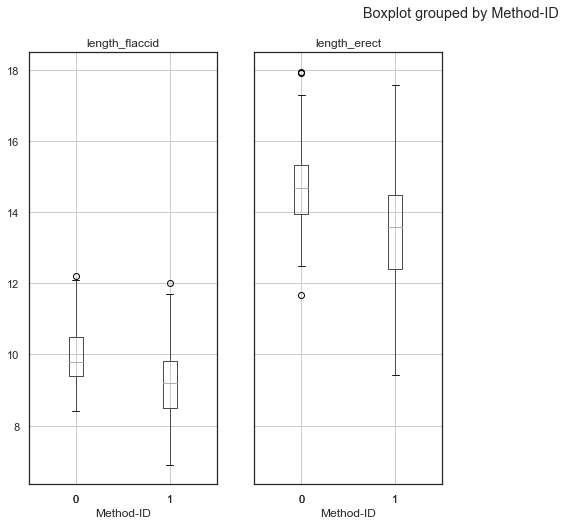

In [32]:
#penis['Region-ID'] = penis['Region'].map({'Central Asia': 0, 'Europe': 1, 'Africa': 2, 'South America': 3, 'Southeast Asia': 4, 'Western Asia': 5,'Pacific Islands': 6,'Australia': 7,'North America': 8,'Central America/Caribean	': 9 ,'Asia': 10})
#penis.sample(10)
penis['Method-ID'] = penis['Method'].map({'Self reported': 0,'Measured':1 })
Penisfeatures = tuple(penis.columns[:2].values)
penis.boxplot(column=Penisfeatures, by='Method-ID', figsize=(15,8), layout=(1,4));
penis.boxplot(column = "Method-ID")

We can see there is a difference in self-measurement and normal meusered. kinda sussy

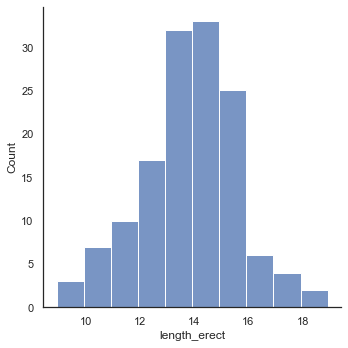

In [28]:
sns.displot(PenisData, x="length_erect", discrete=True)

here you can see the total of lenght erect, the average would defenitly be 14 cm.

In [37]:
#just netherlands
nl = PenisData[ PenisData['Country'] =='Netherlands' ]
nl

,Country,Region,length_flaccid,length_erect,circumf_flaccid,circumf_erect,volume_erect,volume_flaccid,Method,N,Source,growth_length,growth_circumf,growth_volume
89,Netherlands,Europe,9.9,15.6,10.8,13.55,227.93,91.89,Measured,2363.0,Onderzoekscentrum i.o.v. NIBI Nederland. Utrec...,1.575758,1.25463,2.480466


only 1 data entry, obviously not enough to base anything upon

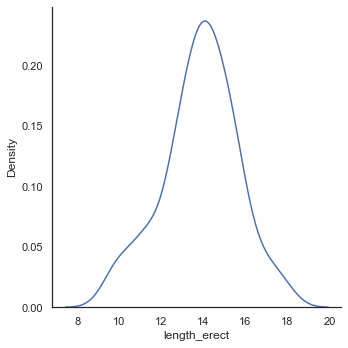

In [44]:
sns.displot(PenisData, x="length_erect", kind="kde")

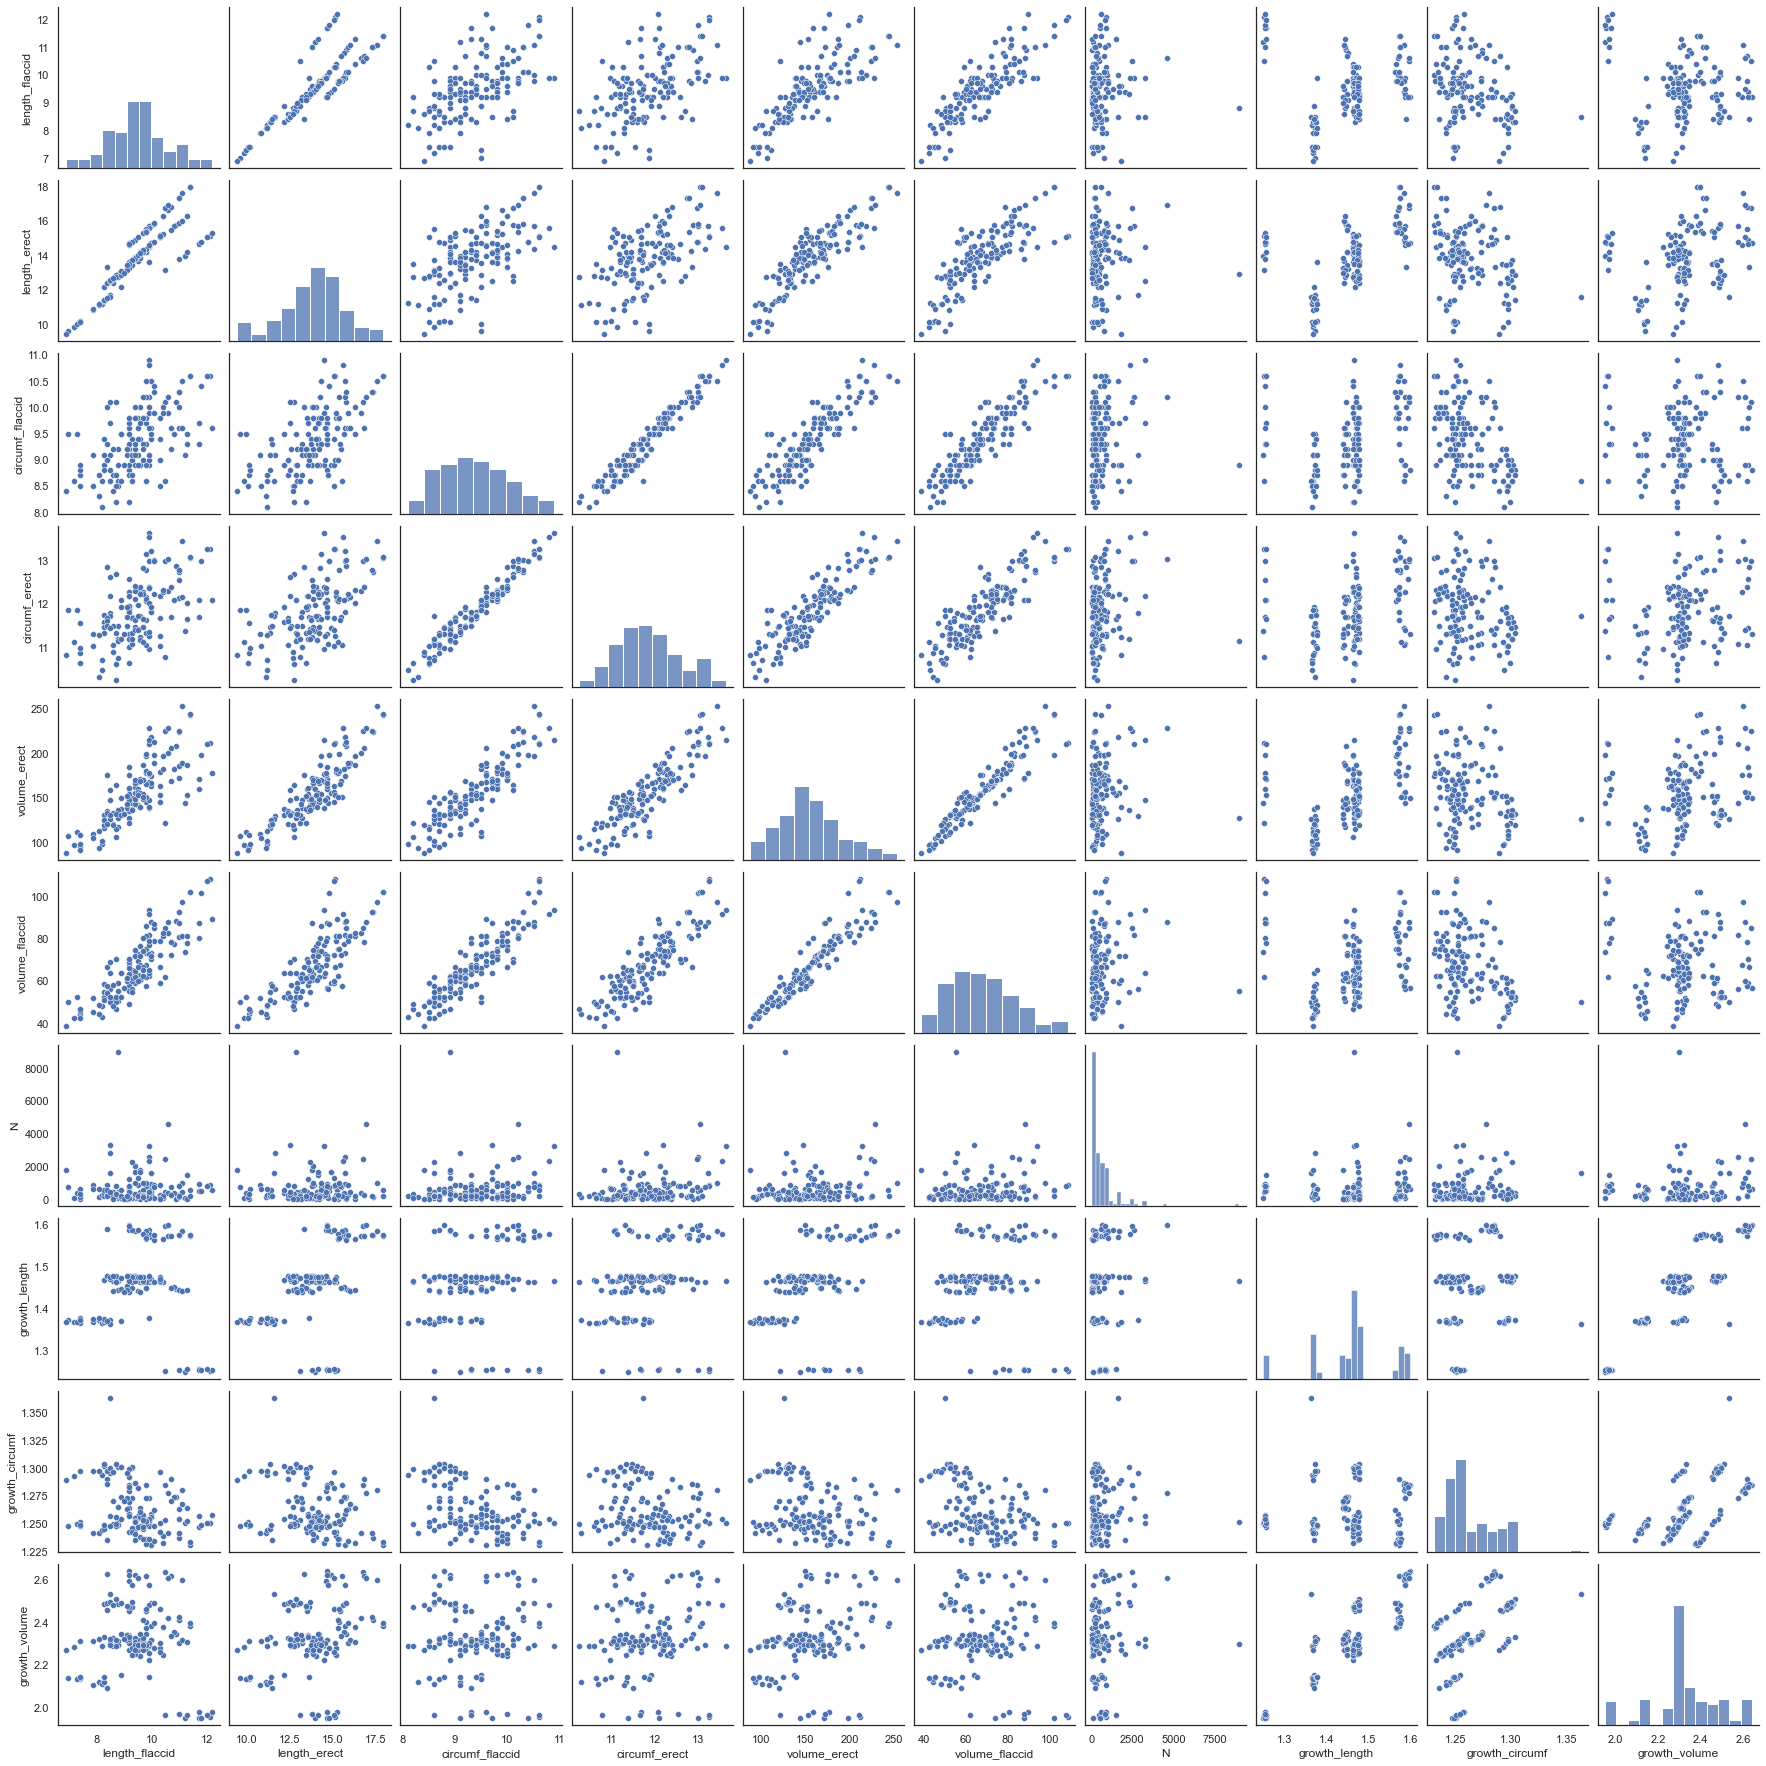

In [40]:
sns.pairplot(PenisData)

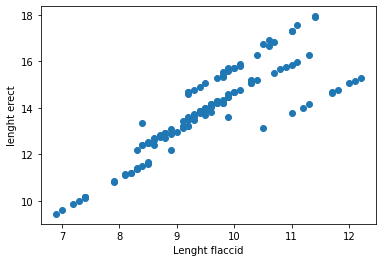

In [8]:
x = PenisData[['length_flaccid']]
y = pp
plt.xlabel('Lenght flaccid')
plt.ylabel('lenght erect')
plt.scatter(x,y)

here we compare lenght flaccid with lenght erect, you can see clear pattern and the possibilty to perform regression on this is very high.

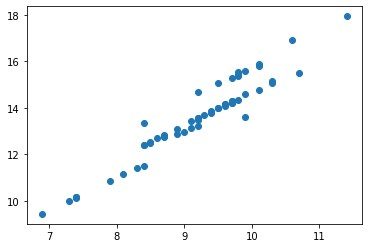

In [9]:
test_x = x[80:]
test_y = y[80:]
plt.scatter(test_x, test_y)

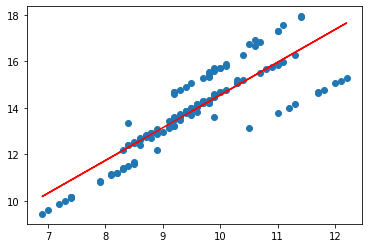

In [10]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()

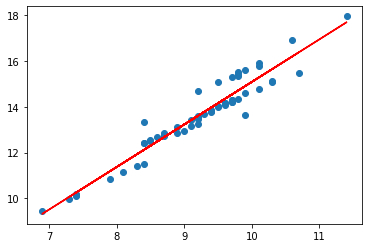

In [11]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(test_x, test_y)  # perform linear regression
Y_pred = linear_regressor.predict(test_x)

plt.scatter(test_x, test_y)
plt.plot(test_x, Y_pred, color='red')
plt.show()

In [12]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)


0.7465850419091378

In [13]:
reg = LinearRegression().fit(test_x, test_y)
reg.score(test_x, test_y)

0.9239164366643392

In [14]:
grouped_single = PenisData.groupby('Region').agg({'length_erect': ['mean', 'min', 'max']})

print(grouped_single)

                         length_erect              
                                 mean    min    max
Region                                             
Africa                      15.281364  11.50  17.95
Asia                        11.652308   9.60  14.16
Australia                   15.745000  15.70  15.79
Central America/Caribean    14.723000  12.40  16.30
Central Asia                13.575000  13.46  13.69
Europe                      14.213250  12.18  15.60
North America               14.007500  13.87  14.15
Pacific Islands             13.265000  12.87  14.19
South America               15.375000  13.34  17.59
South Asia                  11.488000  10.18  12.93
Southeast Asia              10.614286   9.43  11.67
Western Asia                13.255625  11.38  16.82


In [15]:
import matplotlib.pyplot as plt
data = penis[['length_erect']]

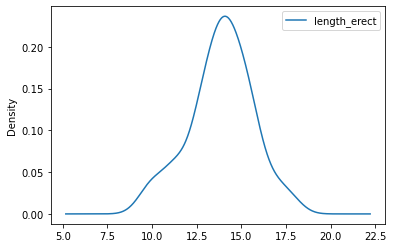

In [16]:
wards = data
wards.plot.kde();

<Figure size 432x288 with 0 Axes>

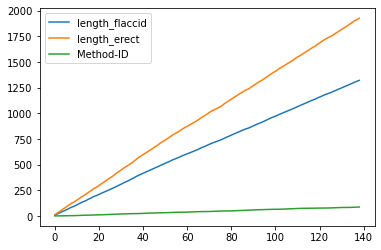

In [17]:
bb = penis.cumsum()

plt.figure();

bb.plot();

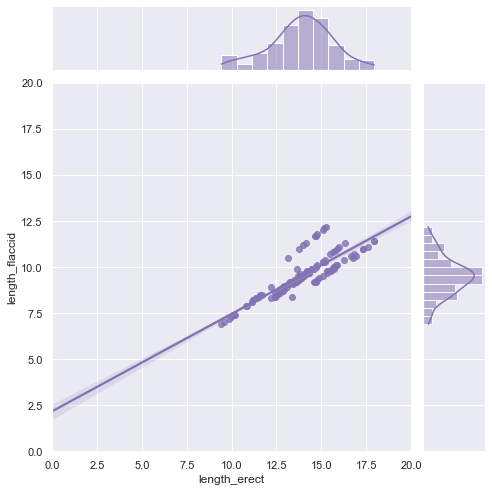

In [18]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="length_erect", y="length_flaccid", data=penis,
                  kind="reg", truncate=False,
                  xlim=(0, 20), ylim=(0, 20),
                  color="m", height=7)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
import seaborn as sns
sns.set_theme(style="white")

g = sns.PairGrid(dick, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)

NameError: name 'dick' is not defined

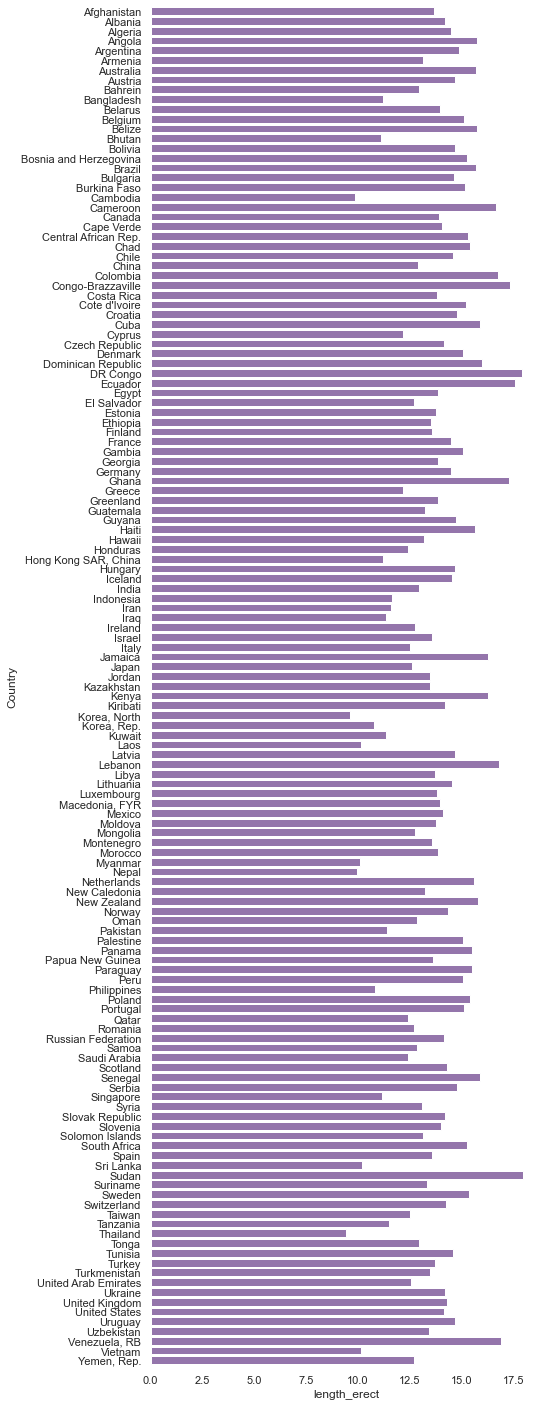

In [22]:
import seaborn as sns
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 25))
sns.set_color_codes("muted")
sns.barplot(x="length_erect", y="Country", data=penis,
            label="Alcohol-involved", color="m")
sns.despine(left=True, bottom=True)

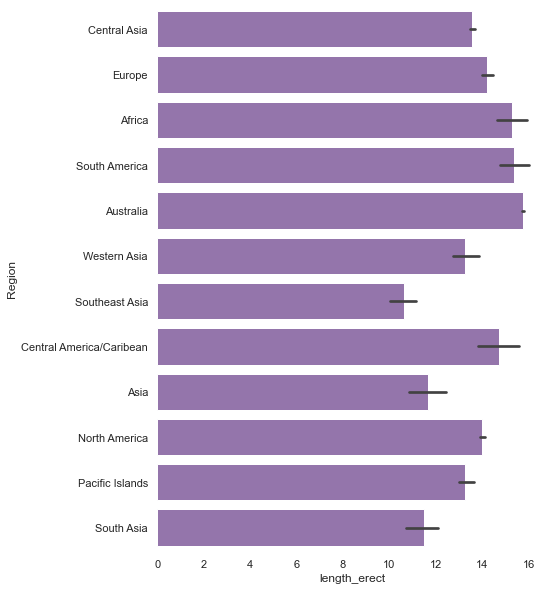

In [23]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 10))
sns.set_color_codes("muted")
sns.barplot(x="length_erect", y="Region", data=PenisData,
            label="Alcohol-involved", color="m")
sns.despine(left=True, bottom=True)